# Dignitas Ukraine PayPal Donations Analytics

In [34]:
import pandas as pd

df = pd.read_excel('./data/PayPal Donations All.xlsx', sheet_name='Sheet1',index_col=None, 
                   usecols = 'A, E, G, I, J, N')
df = df.fillna('Not specified')
print(df.to_string(max_rows=10)) 

         Date              Type   Gross    Net Custom Number         Country
0  2023-05-08   General Payment    1.00   1.00   GeneralPage   Not specified
1  2023-05-08   General Payment    1.00   0.97   GeneralPage   United States
2  2023-05-08      Payment Hold   -0.97  -0.97   GeneralPage   Not specified
3  2023-05-08   General Payment    1.50   1.46   GeneralPage   Not specified
4  2023-05-08  Donation Payment    1.25   0.72   GeneralPage   Not specified
..        ...               ...     ...    ...           ...             ...
51 2023-05-19  Donation Payment  103.48  98.45   GeneralPage          Canada
52 2023-05-19  Donation Payment   50.00  47.31   GeneralPage  United Kingdom
53 2023-05-19  Donation Payment   25.00  23.79    1000DRONES   United States
54 2023-05-19  Donation Payment   30.00  28.64    1000DRONES   United States
55 2023-05-19  Donation Payment   51.99  50.00   GeneralPage   United States


## Number of donations by country

In [2]:
df['Country'].value_counts()

Not specified     23
United States     14
Germany            8
United Kingdom     3
Ukraine            2
France             1
Denmark            1
Italy              1
Belgium            1
Poland             1
Canada             1
Name: Country, dtype: int64

## Totally raised

In [3]:
'${:,.2f}'.format(df['Net'].sum())

'$2,417.84'

## Donation amount stats

In [4]:
#'${:,.2f}'.format(round(df['Net'].median(), 0))
round(df['Gross'].describe(), 0)

count     56.0
mean      45.0
std       60.0
min       -1.0
25%        9.0
50%       21.0
75%       52.0
max      309.0
Name: Gross, dtype: float64

## Most common donation amounts

In [18]:
from collections import Counter

most_common = pd.DataFrame(Counter(df['Gross']).most_common(10),columns =['Amount', 'Frequency'])
most_common['Amount'] = round(most_common['Amount'] / 10)*10
most_common.groupby('Amount').sum()
most_common[most_common['Amount']>0]

,Amount,Frequency
0,100.0,6
1,50.0,5
2,20.0,4
3,50.0,4
4,10.0,4
5,20.0,3
8,10.0,2
9,210.0,2


## Median daily donation amount

In [19]:
'${:,.2f}'.format(round(df['Net'].groupby(df['Date'].dt.to_period('D')).sum().median(), 2))

'$131.16'

## Donations by date

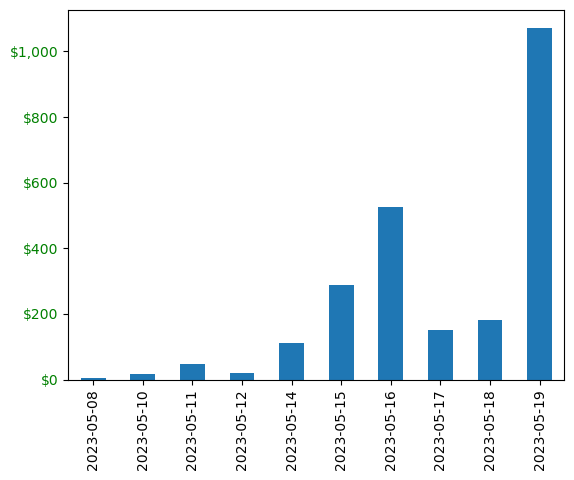

In [20]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


df['Net'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar', xlabel='')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Contributions by initiative

In [31]:
df.groupby('Custom Number').sum()

,Gross,Net
Custom Number,,
1000DRONES,537.71,518.09
GeneralPage,1996.23,1896.84
MobileShowers,3.50,2.91


## Contributions by country

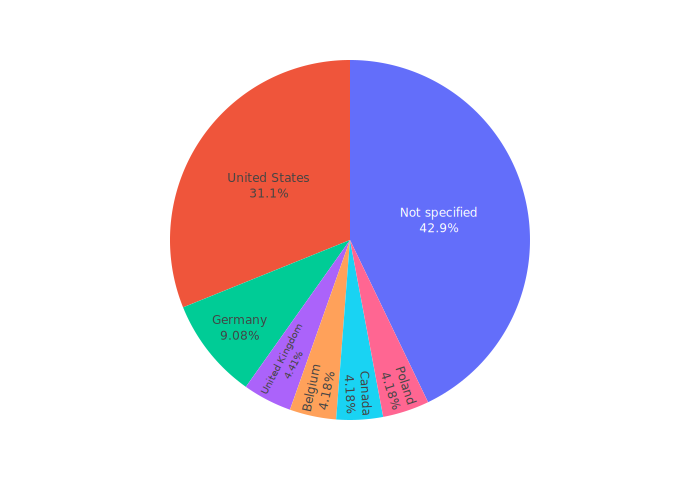

In [21]:
import plotly.io as pio
pio.renderers 
import plotly.express as px

df_country = df.groupby(df['Country'])['Net'].sum().sort_values(ascending=False).head(7).reset_index(name='Net')
fig = px.pie(df_country, values = 'Net', names = 'Country', labels = "Country")
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)
fig.show(renderer='svg')

## Weekly amounts

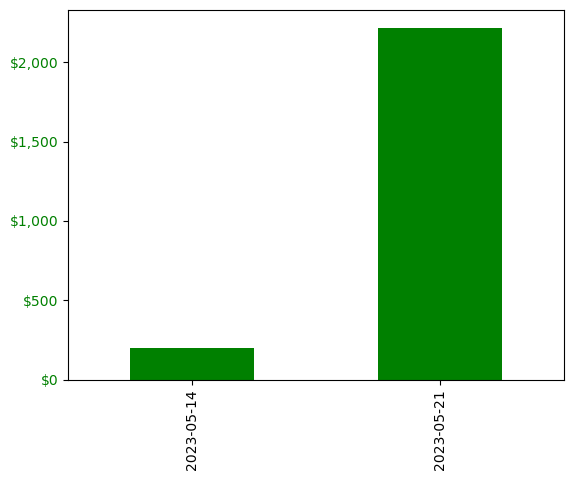

In [22]:
fig, ax = plt.subplots()
df_w = df.groupby([pd.Grouper(key='Date', freq='W')])['Net'].sum()

# remove time from datetime
df_w.index = df_w.index.date

# remove next mo data
#df_w = df_w[:-1]
df_w.plot(kind = 'bar', color = 'green')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green')
plt.show()

## Cumulatively raised

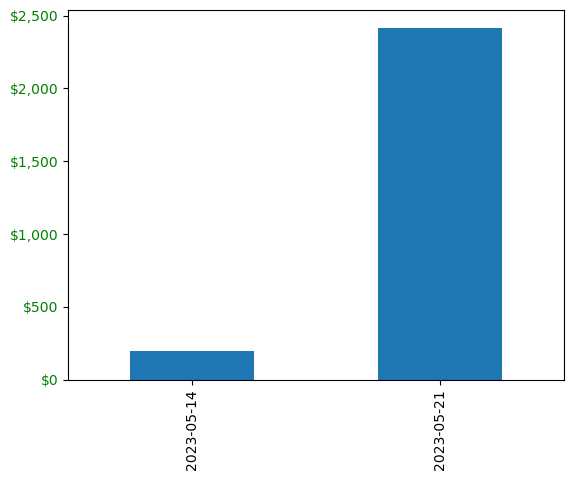

In [23]:
fig, ax = plt.subplots()

df_w.cumsum().plot(kind = 'bar')
# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## We are all united

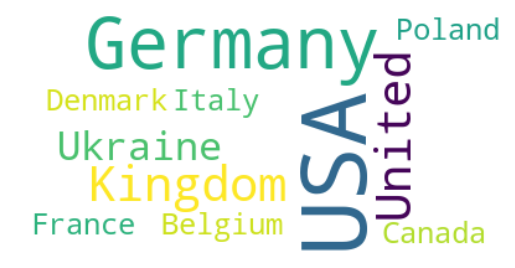

In [24]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

df['Country'] = df['Country'].replace(['United States'], 'USA')
df['Country'] = df['Country'].replace(['New Zealand'], 'NZ')
df['Country'] = df['Country'].replace(['Not specified'], '')
df['Country'] = df['Country'].replace(['Czech Republic'], 'Czech')

text = " ".join(i for i in df['Country'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Number of countries donations come from

In [25]:
df['Country'].nunique()

11

# And we have regular supporters with subscription amount

In [26]:
'${:,.2f}'.format(df.loc[df['Type'] == 'Subscription Payment', 'Net'].sum().round(2))


'$20.75'